попытка построить коридор разбитый на части поопорно

In [47]:
import numpy as np
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
from shapely.ops import split, nearest_points
from descartes import PolygonPatch

In [2]:
%matplotlib inline

In [3]:
c = [(0, 0), (1, 1), (3, 2), (3, 4), (5, 6), (6, 3)]

In [4]:
line = LineString(c)

In [5]:
line.length

11.640986324787455

In [6]:
line.bounds

(0.0, 0.0, 6.0, 6.0)

In [36]:
mid_points = []
for i in range(len(line.coords)-1):
    mp = LineString([line.coords[i], line.coords[i+1]]).interpolate(0.5, normalized = True)
    mid_points.append(mp)

In [53]:
koridor_full = line.buffer(0.5)
type(koridor_full)

shapely.geometry.polygon.Polygon

In [46]:
cut = split(koridor_full, mid_points[1])

ValueError: Splitting a Polygon with a Point is not supported

<AxesSubplot:>

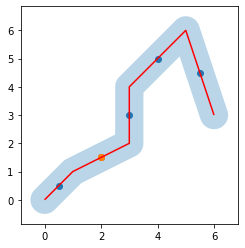

In [51]:
ax = gpd.GeoSeries(line).plot(color='red')
gpd.GeoSeries(koridor_full).plot(ax=ax, alpha=0.3)
gpd.GeoSeries(mid_points).plot(ax=ax)
gpd.GeoSeries(pp2).plot(ax=ax)